# Fig. 1 - Theory Summary

In [1]:
import sys
sys.path.append('..')

import sympy as sp
sp.init_printing()

import numpy as np
from scipy.special import kv, kvp

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')


import lambda_k_plotting_simple as plot
reload(plot)
import analytic_condition as ac

In [2]:
import analytic_condition
reload(analytic_condition)
from analytic_condition import conditions
import equil_solver as es

## Fig. 1  Greyscale version

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: string or anything printable with '%s' conversion. 
  linespacing: float (multiple of font size) 
  multialignment: 

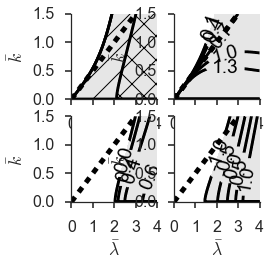

In [9]:
fig, axes = plt.subplots(2, 2,
                         figsize=(3.37, 5),
                         sharex=False, 
                         sharey=False)

example_ax = axes[0][0]
kink_ax = axes[0][1]
sausage_ax = axes[1][0]
delta_ax = axes[1][1]

lambda_bar = np.linspace(0, 4., 500)
k_bar = np.linspace(0, 1.5, 500)
mesh = np.meshgrid(lambda_bar, k_bar)
lambda_bar_mesh, k_bar_mesh = mesh[0], mesh[1]

## Example Plot ##
##################

d_w_sausage = conditions(k_bar_mesh,
                         lambda_bar_mesh,
                         epsilon=0.1,
                         m=0,
                         delta=0.1)
d_w_kink = conditions(k_bar_mesh,
                      lambda_bar_mesh,
                      epsilon=0.1,
                      m=1,
                      delta=0.1)

stability_sausage = d_w_sausage < 0
stability_kink = d_w_kink < 0
stability = stability_kink.astype(float)
stability[stability_sausage] = 2


cmap = colors.ListedColormap(['1.0',
                              '0.9',
                              '0.9'])

example_ax.contourf(lambda_bar_mesh, k_bar_mesh, stability, cmap=cmap,
                    levels=[0., 0.5, 1.5, 2.], hatches=[None, '/', 'x'])
example_ax.contour(lambda_bar_mesh, k_bar_mesh, stability, 
                   levels=[0., 0.5, 1.5, 2.], colors='black')
example_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

# fontsize
example_ax.set_xlabel(r'$\bar{\lambda}$')
plt.setp(example_ax.get_xticklabels())
example_ax.set_xticks(np.arange(0., 5, 1.))

example_ax.set_ylabel(r'$\bar{k}$')
plt.setp(example_ax.get_yticklabels())
example_ax.set_yticks(np.arange(0., 2.0, 0.5))

## Kink Plot ##
###############

delta = 0.0
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0.1, 1.9, 0.3)):

    d_w_kink = conditions(k_bar_mesh,
                          lambda_bar_mesh,
                          epsilon=epsilon,
                          m=1,
                          delta=delta)

    stability_epsilon = d_w_kink < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0.1, 1.9, 0.3)
contour = kink_ax.contourf(lambda_bar_mesh, 
                           k_bar_mesh, 
                           stability,
                           levels=levels)
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-0.1, 0.)
#fontsize
contour_lines = kink_ax.contour(lambda_bar_mesh, 
                               k_bar_mesh, 
                               stability,
                               levels=levels, 
                               colors='black')
kink_ax.clabel(contour_lines, 
                              manual=([1.6, 1.3], 
                                      [2.1, 1.2], 
                                      [2.3, 1.1],
                                      [2.4, 0.8],
                                      [2.4, 0.5]),
                               fmt='%.1f')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
line_x = np.linspace(0, 3, 50)
line_y = np.linspace(0, 1.5, 50)
    
line_y_masked = np.ma.masked_inside(line_y, 1.05, 1.18)    
    
kink_ax.plot(line_x, line_y_masked, '--', c='black', lw=5)

kink_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

#fontsize
kink_ax.set_xlabel(r'$\bar{\lambda}$')
plt.setp(kink_ax.get_xticklabels())
kink_ax.set_xticks(np.arange(0., 5, 1.))

kink_ax.set_ylabel(r'$\bar{k}$')
plt.setp(kink_ax.get_yticklabels())
kink_ax.set_yticks(np.arange(0., 2.0, 0.5))

## Sausage Plot ##
##################

delta = 0.
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0, 1.0, 0.2)):

    d_w_sausage = conditions(k_bar_mesh,
                            lambda_bar_mesh,
                            epsilon=epsilon,
                            m=0,
                            delta=delta)

    stability_epsilon = d_w_sausage < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0., 1., 0.2)
contour = sausage_ax.contourf(lambda_bar_mesh, 
                              k_bar_mesh, 
                              stability,
                              levels=levels)
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-0.2, -0.1)

contour_lines = sausage_ax.contour(lambda_bar_mesh, 
                                   k_bar_mesh, 
                                   stability,
                                   levels=levels, 
                                   colors='black')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
    
sausage_ax.clabel(contour_lines, 
                              manual=([2.5, 0.75],
                                      [2.5, 0.6], 
                                      [3., 0.55],
                                      [3.3, 0.5]),
                               fmt='%.1f')
    
sausage_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
sausage_ax.set_xlabel(r'$\bar{\lambda}$')
plt.setp(sausage_ax.get_xticklabels())
sausage_ax.set_xticks(np.arange(0., 5, 1.))

sausage_ax.set_ylabel(r'$\bar{k}$')
plt.setp(sausage_ax.get_yticklabels())
sausage_ax.set_yticks(np.arange(0., 2.0, 0.5))

### delta variance ###
######################

epsilon = 0.2
stability = np.zeros(lambda_bar_mesh.shape) - 1.2
for i, delta in enumerate(np.arange(-1.0, 1.6, 0.5)):

    d_w_delta = conditions(k_bar_mesh,
                           lambda_bar_mesh,
                           epsilon=epsilon,
                           m=0,
                           delta=delta)

    stability_delta = d_w_delta < 0 
    stability[stability_delta] = delta

levels = np.arange(-1.0, 1.6, 0.5)
contour = delta_ax.contourf(lambda_bar_mesh, 
                            k_bar_mesh, 
                            stability,
                            levels=levels,
                            extend='both')
levels = np.arange(-1.0, 1.6, 0.5)
contour_lines = delta_ax.contour(lambda_bar_mesh, 
                                 k_bar_mesh, 
                                 stability,
                                 levels=levels, 
                                 colors='black')
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-1.3, -1.0)

for line in contour_lines.collections:
    line.set_linestyle('solid')
    
sausage_ax.clabel(contour_lines, 
                  manual=([2., 0.85],
                          [2.4, 0.75],
                          [2.8, 0.65],
                          [3.0, 0.55],
                          [3.3, 0.45]),
                          fmt='%.1f')
    
delta_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

delta_ax.set_xlabel(r'$\bar{\lambda}$')
plt.setp(delta_ax.get_xticklabels())
delta_ax.set_xticks(np.arange(0., 5, 1.))

delta_ax.set_ylabel(r'$\bar{k}$')
plt.setp(delta_ax.get_yticklabels())
delta_ax.set_yticks(np.arange(0., 2.0, 0.5))


sns.despine(fig)
#fig.savefig('../../figures/figure_1.png')
plt.show()

## Fig.1 Color version

<IPython.core.display.Javascript object>


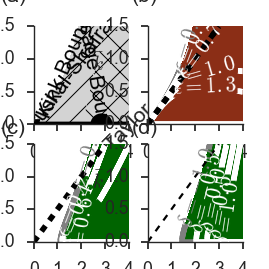

../analytic_condition.py:54: RuntimeWarning: invalid value encountered in divide
  lambda_bar)/(k_bar**2 + m**2)
../analytic_condition.py:93: RuntimeWarning: invalid value encountered in divide
  term3 = (m*lambda_bar - 2.*k_bar)**2/k_bar*(kv(m, np.abs(k_bar)) /
../analytic_condition.py:93: RuntimeWarning: divide by zero encountered in divide
  term3 = (m*lambda_bar - 2.*k_bar)**2/k_bar*(kv(m, np.abs(k_bar)) /
/home/jensv/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in less
/home/jensv/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in less


  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: string or anything printable with '%s' conversion. 
  linespacing: float (multiple of font size) 
  multialignment: 

/home/jensv/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:93: RuntimeWarning: invalid value encountered in less


  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: string or anything printable with '%s' conversion. 
  linespacing: float (multiple of font size) 
  multialignment: 

/home/jensv/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:154: RuntimeWarning: invalid value encountered in less


  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: string or anything printable with '%s' conversion. 
  linespacing: float (multiple of font size) 
  multialignment: 

/home/jensv/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:210: RuntimeWarning: invalid value encountered in less


  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: string or anything printable with '%s' conversion. 
  linespacing: float (multiple of font size) 
  multialignment: 

In [3]:
fig, axes = plt.subplots(2, 2,
                         figsize=(3.37, 5),
                         sharex=False, 
                         sharey=False)

example_ax = axes[0][0]
kink_ax = axes[0][1]
sausage_ax = axes[1][0]
delta_ax = axes[1][1]

## Example Plot ##
##################

lambda_bar = np.linspace(0, 4., 500)
k_bar = np.linspace(0, 1.5, 500)
mesh = np.meshgrid(lambda_bar, k_bar)
lambda_bar_mesh, k_bar_mesh = mesh[0], mesh[1]


d_w_sausage = conditions(k_bar_mesh,
                         lambda_bar_mesh,
                         epsilon=0.1,
                         m=0,
                         delta=0.1)
d_w_kink = conditions(k_bar_mesh,
                      lambda_bar_mesh,
                      epsilon=0.1,
                      m=1,
                      delta=0.1)

stability_sausage = d_w_sausage < 0
stability_kink = d_w_kink < 0
stability = stability_kink.astype(float)
stability[stability_sausage] = 2


cmap = colors.ListedColormap(['white',
                              'lightgrey',
                              'lightgrey'])

example_ax.contourf(lambda_bar_mesh, k_bar_mesh, stability, cmap=cmap,
                    levels=[0., 0.5, 1.5, 2.], hatches=[None, '/', 'x'])
contour_lines = example_ax.contour(lambda_bar_mesh, k_bar_mesh, stability, 
                                   levels=[0., 1.5, 2.], colors='black', linewidths=5)

example_ax.clabel(contour_lines, 
                  manual=([1.5, 1.1],  
                          [2.5, 0.75]),
                  fmt={0.: 'Kink Boundary', 1.5: 'Sausage Boundary'})

kruskal_shafranov = lambda_bar_mesh > 2 * k_bar_mesh

contour_lines = example_ax.contour(lambda_bar_mesh, k_bar_mesh, kruskal_shafranov, 
                                   levels=[0.5], colors='black', linewidths=5)
contour_lines.collections[0].set_linestyle('--')
example_ax.clabel(contour_lines,
                  manual=([[1.8, 0.95]]),
                  fmt={0.5: 'Kruskal-Shafranov'})

#example_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

example_ax.set_xlabel(r'$\bar{\lambda}$')
example_ax.xaxis.labelpad = 20
plt.setp(example_ax.get_xticklabels())
example_ax.set_xticks(np.arange(0., 5, 1.))

example_ax.set_ylabel(r'$\bar{k}$', rotation='horizontal')
plt.setp(example_ax.get_yticklabels())
example_ax.set_yticks(np.arange(0., 2.0, 0.5))

example_ax.plot(2*np.sqrt(2), 0.0, 'o', color='black', markersize=20)
example_ax.annotate('Taylor',
                    xy=(2*np.sqrt(2), 0),
                    xytext=(2*np.sqrt(2) + 0.025, 0.15),
                    rotation=45)

sns.despine()


## Kink Plot ##
###############

delta = 0.0
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0.1, 1.9, 0.3)):

    d_w_kink = conditions(k_bar_mesh,
                          lambda_bar_mesh,
                          epsilon=epsilon,
                          m=1,
                          delta=delta)

    stability_epsilon = d_w_kink < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0.1, 1.9, 0.3)
contour = kink_ax.contourf(lambda_bar_mesh, 
                           k_bar_mesh, 
                           stability,
                           levels=levels)
contour.cmap.set_over(sns.xkcd_rgb['red brown'])
contour.cmap.set_under('white')
contour.set_clim(-0.1, 0.)
colors_list = ['grey', 'white', 'white', 'white', 'white']
contour_lines = kink_ax.contour(lambda_bar_mesh, 
                               k_bar_mesh, 
                               stability,
                               levels=levels, 
                               colors=colors_list,
                               linewidths=5)
kink_ax.clabel(contour_lines, 
                              manual=([1.6, 1.3], 
                                      [2.1, 1.2], 
                                      [2.3, 1.1],
                                      [2.4, 0.8],
                                      [2.4, 0.5]),
                               fmt=r'$ \epsilon = %.1f $', colors=colors_list)
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
line_x = np.linspace(0, 3, 50)
line_y = np.linspace(0, 1.5, 50)
    
line_y_masked = np.ma.masked_inside(line_y, 1.05, 1.18)    
    
kink_ax.plot(line_x, line_y_masked, '--', c='black', lw=5)


kink_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
kink_ax.set_xlabel(r'$\bar{\lambda}$')
kink_ax.xaxis.labelpad = 20
plt.setp(kink_ax.get_xticklabels())
kink_ax.set_xticks(np.arange(0., 5, 1.))

kink_ax.set_ylabel(r'$\bar{k}$', rotation='horizontal')
plt.setp(kink_ax.get_yticklabels())
kink_ax.set_yticks(np.arange(0., 2.0, 0.5))

sns.despine()

## Sausage Plot ##
##################

delta = -0.7
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0, 1.2, 0.2)):

    d_w_sausage = conditions(k_bar_mesh,
                            lambda_bar_mesh,
                            epsilon=epsilon,
                            m=0,
                            delta=delta)

    stability_epsilon = d_w_sausage < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0., 1.2, 0.2)
contour = sausage_ax.contourf(lambda_bar_mesh, 
                              k_bar_mesh, 
                              stability,
                              levels=levels)
contour.cmap.set_over('darkgreen')
contour.cmap.set_under('white')
contour.set_clim(-0.2, -0.1)

colors_list = ['grey', 'white', 'white', 'white']

contour_lines = sausage_ax.contour(lambda_bar_mesh, 
                                   k_bar_mesh, 
                                   stability,
                                   levels=levels, 
                                   colors=colors_list,
                                   linewidths=5)
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
    
sausage_ax.clabel(contour_lines, 
                              manual=([2.3, 1.3],
                                      [1.75, 0.55],
                                      [2.0, 0.4],
                                      [2.1, 0.2]),
                               fmt=r'$ \epsilon = %.1f$')
    
sausage_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
sausage_ax.set_xlabel(r'$\bar{\lambda}$')
sausage_ax.xaxis.labelpad = 20
plt.setp(sausage_ax.get_xticklabels())
sausage_ax.set_xticks(np.arange(0., 5, 1.))

sausage_ax.set_ylabel(r'$\bar{k}$', rotation='horizontal')
plt.setp(sausage_ax.get_yticklabels())
sausage_ax.set_yticks(np.arange(0., 2.0, 0.5))
sns.despine()


## Delta dependence ##
######################

epsilon = 0.2
stability = np.zeros(lambda_bar_mesh.shape) - 1.2
for i, delta in enumerate(np.arange(-1.0, 1.6, 0.5)):

    d_w_delta = conditions(k_bar_mesh,
                           lambda_bar_mesh,
                           epsilon=epsilon,
                           m=0,
                           delta=delta)

    stability_delta = d_w_delta < 0 
    stability[stability_delta] = delta

levels = np.arange(-1.0, 1.6, 0.5)
contour = delta_ax.contourf(lambda_bar_mesh, 
                            k_bar_mesh, 
                            stability,
                            levels=levels,
                            extend='both')
levels = np.arange(-1.0, 1.6, 0.5)

colors_list = ['grey', 'white', 'white', 'white', 'white']

contour_lines = delta_ax.contour(lambda_bar_mesh, 
                                 k_bar_mesh, 
                                 stability,
                                 levels=levels, 
                                 colors=colors_list,
                                 linewidths=5)
contour.cmap.set_over('darkgreen')
contour.cmap.set_under('white')
contour.set_clim(-1.3, -1.0)

for line in contour_lines.collections:
    line.set_linestyle('solid')
    
sausage_ax.clabel(contour_lines,  
                  manual=([2., 0.85],
                          [2.4, 0.75],
                          [2.8, 0.65],
                          [3.0, 0.55],
                          [3.3, 0.45]),
                  fmt=r'$ \delta = \mathbf{%.1f}$',
                  colors=colors_list)
    
delta_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=2)
delta_ax.set_xlabel(r'$\bar{\lambda}$')
delta_ax.xaxis.labelpad = 20
plt.setp(delta_ax.get_xticklabels())
delta_ax.set_xticks(np.arange(0., 5, 1.))

delta_ax.set_ylabel(r'$\bar{k}$', rotation='horizontal')
plt.setp(delta_ax.get_yticklabels())
delta_ax.set_yticks(np.arange(0., 2.0, 0.5))

##plt.tight_layout()

##fig.savefig('../../figures/figure_1.svg')

plt.figtext(0.001, 0.99, '(a)')
plt.figtext(0.001, 0.5, '(c)')
plt.figtext(0.49, 0.99, '(b)')
plt.figtext(0.49, 0.5, '(d)')

fig.show()

# Fig 2 Profiles normalized to skin

In [74]:
def normalized_single_plot(profile, axes, ylim, letter, styles=['-', '--', '-.'],
                           legend_loc=None):
    r"""
    """
    splines = profile.get_splines()
    beta_spl = profile.beta(profile.r)
    r1 = np.linspace(0, 1., 250)
    
    j_skin = profile.j_skin
    b_z0 = profile.b_z0
    
    
    axes.yaxis.tick_left()
    axes.xaxis.tick_bottom()
    
    j_z_line = axes.plot(r1, splines['j_z'](r1)/j_skin, lw=2.5, label=r'$\bar{j}_z$', ls=styles[0])
    b_theta_line = axes.plot(r1, splines['b_theta'](r1), lw=2.5, label=r'$\bar{B}_\theta$', ls=styles[1])
    p_line = axes.plot(r1, splines['pressure'](r1), lw=2.5, label=r'$\bar{p}$', ls=styles[2])
    #j_z_line = axes.plot(r1, splines['j_z'](r1)/j_skin, lw=2.5, ls=styles[0])
    #b_theta_line = axes.plot(r1, splines['b_theta'](r1), lw=2.5, ls=styles[1])
    #p_line = axes.plot(r1, splines['pressure'](r1), lw=2.5, ls=styles[2])
    axes.set_xlim(0, 1.)
    
    axes.set_ylim(0., ylim)
    
    if legend_loc:
        lgd = axes.legend(bbox_to_anchor=legend_loc, 
                    loc='upper center', borderaxespad=0.25, ncol=3, frameon=True,
                    handlelength=1.2, columnspacing=0.5, fancybox=True)
    else:
        lgd = None
    
    #axes.annotate('core', xy=(0.27, ylim*4.5/7.))
    #axes.annotate('transition', xy=(0.624, ylim*4.5/7.))
    #axes.annotate('skin', xy=(0.772, ylim*4.5/7.))
    #axes.annotate('transition', xy=(0.85, ylim*4.5/7.))
    
    axes.set_xlabel(r'$r$')
    axes.axvline(x=0.6, color='grey', ls='--', lw=2.5, alpha=0.5)
    axes.axvline(x=0.775, color='grey', ls='--', lw=2.5, alpha=0.5)
    axes.axvline(x=0.825, color='grey', ls='--', lw=2.5, alpha=0.5)
    axes.yaxis.set_ticks(np.arange(0.0, 1.8, 0.7))
    
    plt.setp(axes.get_xticklabels())
    plt.setp(axes.get_yticklabels())
    return lgd

In [88]:
fig = plt.figure(figsize=(3.75,5.5))
axes1 = plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=1)
axes2 = plt.subplot2grid((3, 2), (1, 0), colspan=2, rowspan=1)
axes3 = plt.subplot2grid((3, 2), (2, 0), colspan=2, rowspan=1)
fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(hspace=0.5)

profile = es.UnitlessSmoothedCoreSkin(k_bar=1, lambda_bar=1, epsilon=0.7, 
                                      core_radius_norm=0.6,
                                      transition_width_norm=0.175,
                                      skin_width_norm=0.05) 

lgd = normalized_single_plot(profile, axes1, 1.8, 'a', legend_loc=[0.4, 1.5])

profile = es.UnitlessSmoothedCoreSkin(k_bar=1, lambda_bar=1, epsilon=0.5, 
                                      core_radius_norm=0.6,
                                      transition_width_norm=0.175,
                                      skin_width_norm=0.05) 

normalized_single_plot(profile, axes2, 1.8, 'b')

profile = es.UnitlessSmoothedCoreSkin(k_bar=1, lambda_bar=1, epsilon=0.3, 
                                      core_radius_norm=0.6,
                                      transition_width_norm=0.175,
                                      skin_width_norm=0.05) 

normalized_single_plot(profile, axes3, 1.8, 'c')
#axes1.legend(loc='best')
#axes2.legend(loc='best')
#axes3.legend(loc='best')
#plt.figlegend([l1, l2, l3], 
#           [r'$\bar{j}_z$',
#            r'$\bar{B}_\theta$',
#            r'$\bar{p}$'], 'upper left',
#           bbox_to_anchor = (0.5, 0.5))

#plt.tight_layout()
plt.figtext(-0.05, 0.90, '(a)')
plt.figtext(-0.05, 0.60, '(b)')
plt.figtext(-0.05, 0.30, '(c)')
#plt.show()
plt.savefig('../../figures/figure2.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: string or anything printable with '%s' conversion. 
  linespacing: float (multiple of font size) 
  multialignment: 

In [29]:
fig.legend?

# Fig 3 Summary Numerics Figure

In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.colors import SymLogNorm, BoundaryNorm
from matplotlib.ticker import FormatStrFormatter, FixedFormatter
import matplotlib.patches as patches
import matplotlib.ticker as ticker

In [118]:
def plot_lambda_k_space_dw(axes, filename, epsilon, name, mode_to_plot='m_neg_1',
                           show_points=False, lim=None, levels=None, log=True,
                           linthresh=1E-7, bounds=(1.5, 3.0), norm=True,
                           analytic_compare=False,
                           label_pos=((0.5, 0.4), (2.1, 0.4), (2.8, 0.2)),
                           delta_values=[-1,0,1],
                           interpolate=False,
                           cmap=None, hatch=False,
                           figsize=None,
                           save_as=None,
                           return_ax=False, 
                           hatch_sausage_gap=False):

    epsilon_case = np.load(filename)
    lambda_a_mesh = epsilon_case['lambda_a_mesh']
    k_a_mesh = epsilon_case['k_a_mesh']
    external_m_neg_1 = epsilon_case['d_w_m_neg_1']
    external_sausage = epsilon_case['d_w_m_0']
    epsilon_case.close()
    
    if hatch_sausage_gap:
        external_sausage_gap = np.where((lambda_a_mesh > 3.) & (external_sausage > 0))
        external_sausage[external_sausage_gap] = np.nan

    instability_map = {'m_0': external_sausage,
                       'm_neg_1': external_m_neg_1}


    kink_pal = sns.blend_palette([sns.xkcd_rgb["dandelion"],
                                  sns.xkcd_rgb["white"]], 7, as_cmap=True)
    kink_pal = sns.diverging_palette(73, 182, s=72, l=85, sep=1, n=9, as_cmap=True)
    sausage_pal = sns.blend_palette(['orange', 'white'], 7, as_cmap=True)
    sausage_pal = sns.diverging_palette(49, 181, s=99, l=78, sep=1, n=9, as_cmap=True)

    if cmap:
        instability_palette = {'m_0': cmap,
                               'm_neg_1': cmap}
    else:
        instability_palette = {'m_0': sausage_pal,
                               'm_neg_1': kink_pal}




    if interpolate:
        instability_map['m_neg_1'] = interpolate_nans(lambda_a_mesh,
                                                      k_a_mesh,
                                                      instability_map['m_neg_1']
                                                      )

    values = instability_map[mode_to_plot]

    if norm:
        values = values / np.nanmax(np.abs(values))
    else:
        values = values

    if levels:
        if log:
            plot = axes.contourf(lambda_a_mesh, k_a_mesh, values,
                                cmap=instability_palette[mode_to_plot],
                                levels=levels, norm=SymLogNorm(linthresh))
            divider = make_axes_locatable(axes)
            cax = divider.append_axes("right", size="5%", pad=0.55)
            cbar = plt.colorbar(plot, cax=cax, label=r'$\delta W$')
            cbar.ax.yaxis.set_ticks_position('right')
            cbar.set_label(label=r'$\delta W$', size=30, rotation=0, labelpad=10)
            contourlines = axes.contour(lambda_a_mesh, k_a_mesh,
                                      values, levels=levels,
                                      colors='grey',
                                      norm=SymLogNorm(linthresh))

        else:
            norm = BoundaryNorm(levels, 256)
            plot = axes.contourf(lambda_a_mesh, k_a_mesh, values,
                                cmap=instability_palette[mode_to_plot],
                                levels=levels, norm=norm)
            divider = make_axes_locatable(axes)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = plt.colorbar(plot, cax=cax, label=r'$\delta W$')
            cbar.set_label(label=r'$\delta W$', size=30, rotation=0, labelpad=10)
            contourlines = axes.contour(lambda_a_mesh, k_a_mesh,
                                       values, levels=levels,
                                       colors='grey')
    else:
        if log:
            plot = axes.contourf(lambda_a_mesh, k_a_mesh, values,
                                cmap=instability_palette[mode_to_plot],
                                norm=SymLogNorm(linthresh))
            divider = make_axes_locatable(axes)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = plt.colorbar(plot, cax=cax, label=r'$\delta W$')
            cbar.set_label(label=r'$\delta W$', size=30, rotation=0, labelpad=10)
            contourlines = axes.contour(lambda_a_mesh, k_a_mesh,
                                       values, colors='grey',
                                       norm=SymLogNorm(linthresh))
        else:
            plot = plt.contourf(lambda_a_mesh, k_a_mesh, values,
                                cmap=instability_palette[mode_to_plot])
            divider = make_axes_locatable(axes)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = plt.colorbar(plot, cax=cax, label=r'$\delta W$')
            cbar.set_label(label=r'$\delta W$', size=30, rotation=0, labelpad=10)
            contourlines = axes.contour(lambda_a_mesh, k_a_mesh,
                                       values, colors='grey')

    if lim:
        plot.set_clim(lim)
    
    cbar.add_lines(contourlines)
    
    cbar_lines = cbar.lines[0]
    number_of_lines = len(cbar_lines.get_linewidths())
    
    linewidths = []
    linestyles = []
    cbar_zero_line = 4
    for line in xrange(number_of_lines):
        if line < cbar_zero_line:
            linewidths.append(2.8)
            linestyles.append('--')
        elif line == cbar_zero_line:
            linewidths.append(2.8)
            linestyles.append('-')
        else:  
            linewidths.append(2.8)
            linestyles.append('-')
            
    cbar_lines.set_linewidths(linewidths)
    cbar_lines.set_linestyles(linestyles)

    axes.plot([0.01, 0.1, 1.0, 2.0, 3.0],
             [0.005, 0.05, 0.5, 1.0, 1.5], color='black')

    axes.set_axis_bgcolor(sns.xkcd_rgb['white'])

    lambda_bar_analytic = np.linspace(0.01, 4., 750)
    k_bar_analytic = np.linspace(0.01, 1.5, 750)
    (lambda_bar_mesh_analytic,
     k_bar_mesh_analytic) = np.meshgrid(lambda_bar_analytic, k_bar_analytic)

    if analytic_compare:
        analytic_comparison(mode_to_plot, k_bar_mesh_analytic,
                            lambda_bar_mesh_analytic, epsilon, label_pos)

    if show_points:
        axes.scatter(lambda_a_mesh, k_a_mesh, marker='o', c='b', s=5)

    axes.set_ylim(0.01, bounds[0])
    axes.set_xlim(0.01, bounds[1])
    axes.set_xticks(np.arange(0., 4.5, 1.0))
    axes.set_yticks(np.arange(0., 2.0, 0.5))
    plt.setp(axes.get_xticklabels(), fontsize=30)
    plt.setp(axes.get_yticklabels(), fontsize=30)
    axes.set_ylabel(r'$\bar{k}$', fontsize=30, rotation='horizontal', labelpad=10)
    axes.set_xlabel(r'$\bar{\lambda}$', fontsize=30)
    cbar.ax.tick_params(labelsize=30)

    def my_formatter_fun(x):
        if x == 0:
            return r'$0$'
        if np.sign(x) > 0:
            return r'$10^{%i}$' % np.int(np.log10(x))
        else:
            return r'$-10^{%i}$' % np.int(np.log10(np.abs(x)))
    labels = [my_formatter_fun(level) for level in levels]
    cbar.ax.set_yticklabels(labels)
    sns.despine(ax=axes)

    if hatch:
        xmin, xmax = axes.get_xlim()
        ymin, ymax = axes.get_ylim()
        xy = (xmin,ymin+0.1)
        width = xmax - xmin
        height = ymax - ymin
        p = patches.Rectangle(xy, width, height, hatch='X'*3, fill=None, zorder=-10, edgecolor='#d5b60a')
        axes.add_patch(p)
    if hatch_sausage_gap:
        xmin, xmax = axes.get_xlim()
        ymin, ymax = axes.get_ylim()
        xmin = 3.
        xy = (xmin, ymin+0.01)
        width = xmax - xmin
        height = ymax - ymin
        p = patches.Rectangle(xy, width, height, hatch='X'*3, fill=None, zorder=-10, edgecolor='green')
        axes.add_patch(p)    
    cbar.ax.yaxis.set_ticks_position('right')

In [162]:
def sausage_kink_ratio(axes, filename, xy_limits=None, cmap=None, save_as=None,
                       levels=None, zero_line=2, label_lines=False, cbar_zero_line=2):
    r"""
    Plot ratio of sausage and kink potential energies.
    """
    meshes = np.load(filename)
    lambda_bar_mesh = meshes['lambda_a_mesh']
    k_bar_mesh = meshes['k_a_mesh']
    external_m_neg_1 = meshes['d_w_m_neg_1']
    external_sausage = meshes['d_w_m_0']
    meshes.close()

    sausage_stable_region = np.invert((external_sausage < 0))
    ratio = np.abs(external_sausage / external_m_neg_1)
    ratio[sausage_stable_region] = np.nan
    ratio_log = np.log10(ratio)

    if not cmap:
        cmap = sns.light_palette(sns.xkcd_rgb['red orange'],
                                 as_cmap=True)
    if levels:
        contours = axes.contourf(lambda_bar_mesh, k_bar_mesh,
                                ratio_log, cmap=cmap, levels=levels)
    else:
        contours = axes.contourf(lambda_bar_mesh, k_bar_mesh,
                                ratio_log, cmap=cmap)

    divider = make_axes_locatable(axes)
    cax = divider.append_axes("right", size="10%", pad=0.55)
    colorbar = plt.colorbar(contours, cax=cax, format=FormatStrFormatter(r'$10^{%i}$'))
    colorbar.set_label(r'$\frac{\delta W_{m=0}}{\delta W_{m=1}}$',
                       size=30, rotation=0, labelpad=25)
    if levels:
        lines = axes.contour(lambda_bar_mesh, k_bar_mesh,
                            ratio_log, colors='black', levels=levels)
    else:
        lines = axes.contour(lambda_bar_mesh, k_bar_mesh,
                            ratio_log, colors='black')
    plt.setp(lines.collections[zero_line], linewidth=10)
    colorbar.add_lines(lines)
    
    cbar_lines = colorbar.lines[0]
    number_of_lines = len(cbar_lines.get_linewidths())
    
    linewidths = []
    linestyles = []
    for line in xrange(number_of_lines):
        if line < cbar_zero_line:
            linewidths.append(2.8)
            linestyles.append('--')
        elif line == cbar_zero_line:
            linewidths.append(10)
            linestyles.append('-')
        else:  
            linewidths.append(2.8)
            linestyles.append('-')
    
    cbar_lines.set_linewidths(linewidths)
    cbar_lines.set_linestyles(linestyles)

    axes.plot([0, 3.], [0., 1.5], '--', c='black', lw=8)
    axes.set_xlabel(r'$\bar{\lambda}$', fontsize=30)
    plt.setp(axes.get_xticklabels(), fontsize=30)
    axes.set_xticks(np.arange(0., 4.5, 1.0))

    axes.set_ylabel(r'$\bar{k}$', fontsize=30, rotation='horizontal')
    plt.setp(axes.get_yticklabels(), fontsize=30)
    axes.set_yticks(np.arange(0., 2.0, 0.5))
    
    if label_lines:
        plt.clabel(lines)
    
    if xy_limits:
        axes.set_ylim((xy_limits[0], xy_limits[1]))
        axes.set_xlim((xy_limits[2], xy_limits[3]))
    plt.setp(axes.get_xticklabels(), fontsize=30)
    plt.setp(axes.get_yticklabels(), fontsize=30)
    axes.set_xlim((0, 4.3))
    sns.despine(ax=axes)
    colorbar.ax.yaxis.set_ticks_position('right')
    colorbar.ax.tick_params(labelsize=25)

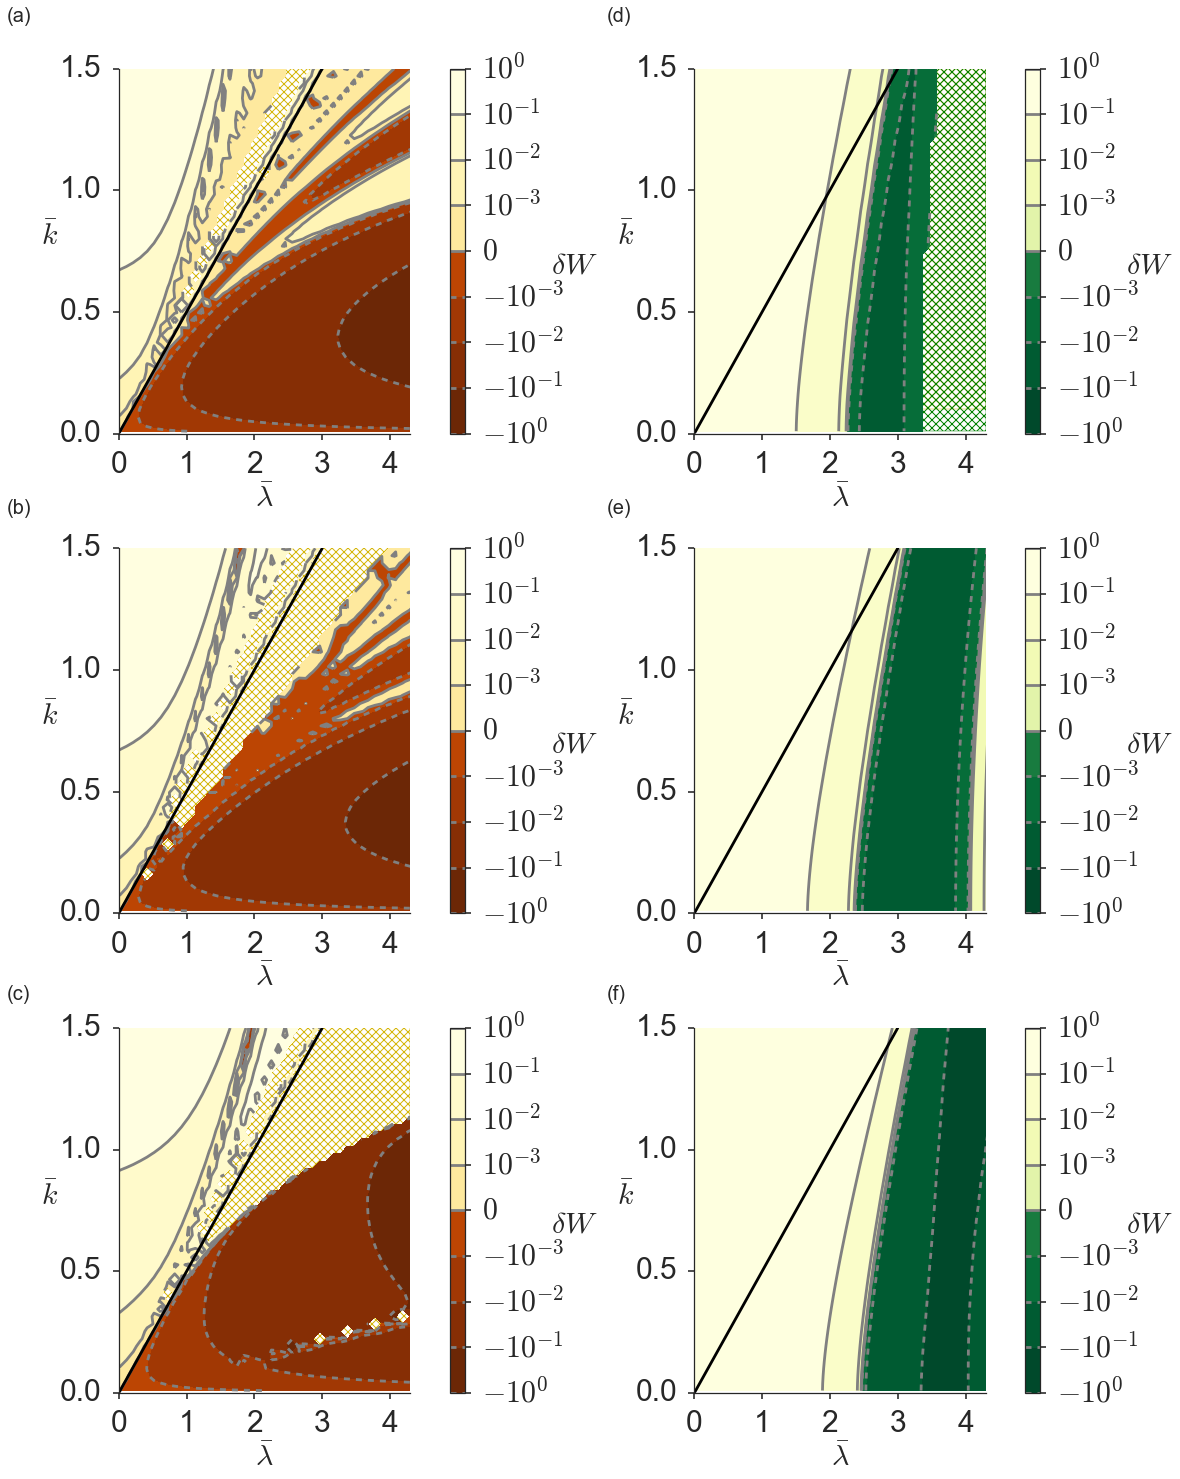

In [163]:
fig = plt.figure(figsize=(17,21))

kink_ax1 = plt.subplot2grid((9, 6), (0, 0), colspan=3, rowspan=3)
sausage_ax1 = plt.subplot2grid((9, 6), (0, 3), colspan=3, rowspan=3)
kink_ax2 = plt.subplot2grid((9, 6), (3, 0), colspan=3, rowspan=3)
sausage_ax2 = plt.subplot2grid((9, 6), (3, 3), colspan=3, rowspan=3)
kink_ax3 = plt.subplot2grid((9, 6), (6, 0), colspan=3, rowspan=3)
sausage_ax3 = plt.subplot2grid((9, 6), (6, 3), colspan=3, rowspan=3)


## High epsilon
plot_lambda_k_space_dw(kink_ax1, '../../output/2016-04-29-17-15/meshes.npz', 
                       1., 'ep12-m1', mode_to_plot='m_neg_1', 
                       levels=[-1, -1e-1, -1e-2, -1e-3, 
                               0, 1e-3, 1e-2, 1e-1, 1], 
                       norm=True, analytic_compare=False,
                       log=True,
                       label_pos=None,
                       interpolate=False, cmap="YlOrBr_r",
                       hatch=True,
                       bounds=(1.5, 4.3))


plot_lambda_k_space_dw(sausage_ax1, '../../output/2016-04-29-17-15/meshes.npz', 
                       1., 'ep12-m1', mode_to_plot='m_0', 
                       levels=[-1, -1e-1, -1e-2, -1e-3, 
                               0, 1e-3, 1e-2, 1e-1, 1], 
                       norm=True, analytic_compare=False,
                       log=True,
                       label_pos=None,
                       interpolate=False, cmap="YlGn_r",
                       hatch=True,
                       bounds=(1.5, 4.3),
                       hatch_sausage_gap=True)



## Mid epsilon
plot_lambda_k_space_dw(kink_ax2, '../../output/2016-04-29-11-13/meshes.npz', 
                       1., 'ep12-m1', mode_to_plot='m_neg_1', 
                       levels=[-1, -1e-1, -1e-2, -1e-3, 
                               0, 1e-3, 1e-2, 1e-1, 1], 
                       norm=True, analytic_compare=False,
                       log=True,
                       label_pos=None,
                       interpolate=False, cmap="YlOrBr_r",
                       hatch=True,
                       bounds=(1.5, 4.3))


plot_lambda_k_space_dw(sausage_ax2, '../../output/2016-04-29-11-13/meshes.npz', 
                       1., 'ep12-m1', mode_to_plot='m_0', 
                       levels=[-1, -1e-1, -1e-2, -1e-3, 
                               0, 1e-3, 1e-2, 1e-1, 1], 
                       norm=True, analytic_compare=False,
                       log=True,
                       label_pos=None,
                       interpolate=False, cmap="YlGn_r",
                       hatch=True,
                       bounds=(1.5, 4.3))




## Low epsilon
plot_lambda_k_space_dw(kink_ax3, '../../output/2016-04-29-11-36/meshes.npz', 
                       1., 'ep12-m1', mode_to_plot='m_neg_1', 
                       levels=[-1, -1e-1, -1e-2, -1e-3, 
                               0, 1e-3, 1e-2, 1e-1, 1], 
                       norm=True, analytic_compare=False,
                       log=True,
                       label_pos=None,
                       interpolate=False, cmap="YlOrBr_r",
                       bounds=(1.5, 4.3),
                       hatch=True)

plot_lambda_k_space_dw(sausage_ax3, '../../output/2016-04-29-11-36/meshes.npz', 
                       1., 'ep12-m1', mode_to_plot='m_0', 
                       levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                       norm=True, analytic_compare=False,
                       log=True,
                       label_pos=None,
                       bounds=(1.5, 4.3),
                       interpolate=False, cmap="YlGn_r",
                       hatch=True)



plt.tight_layout(pad=2.4, w_pad=1.0, h_pad=1.0)

plt.figtext(0.01, 0.99, '(a)', fontsize=20)
plt.figtext(0.01, 0.665, '(b)', fontsize=20)
plt.figtext(0.01, 0.343, '(c)', fontsize=20)
plt.figtext(0.5, 0.99, '(d)', fontsize=20)
plt.figtext(0.5, 0.665, '(e)', fontsize=20)
plt.figtext(0.5, 0.343, '(f)', fontsize=20)


##plt.savefig('figure_3.png', dpi=600)
plt.show()

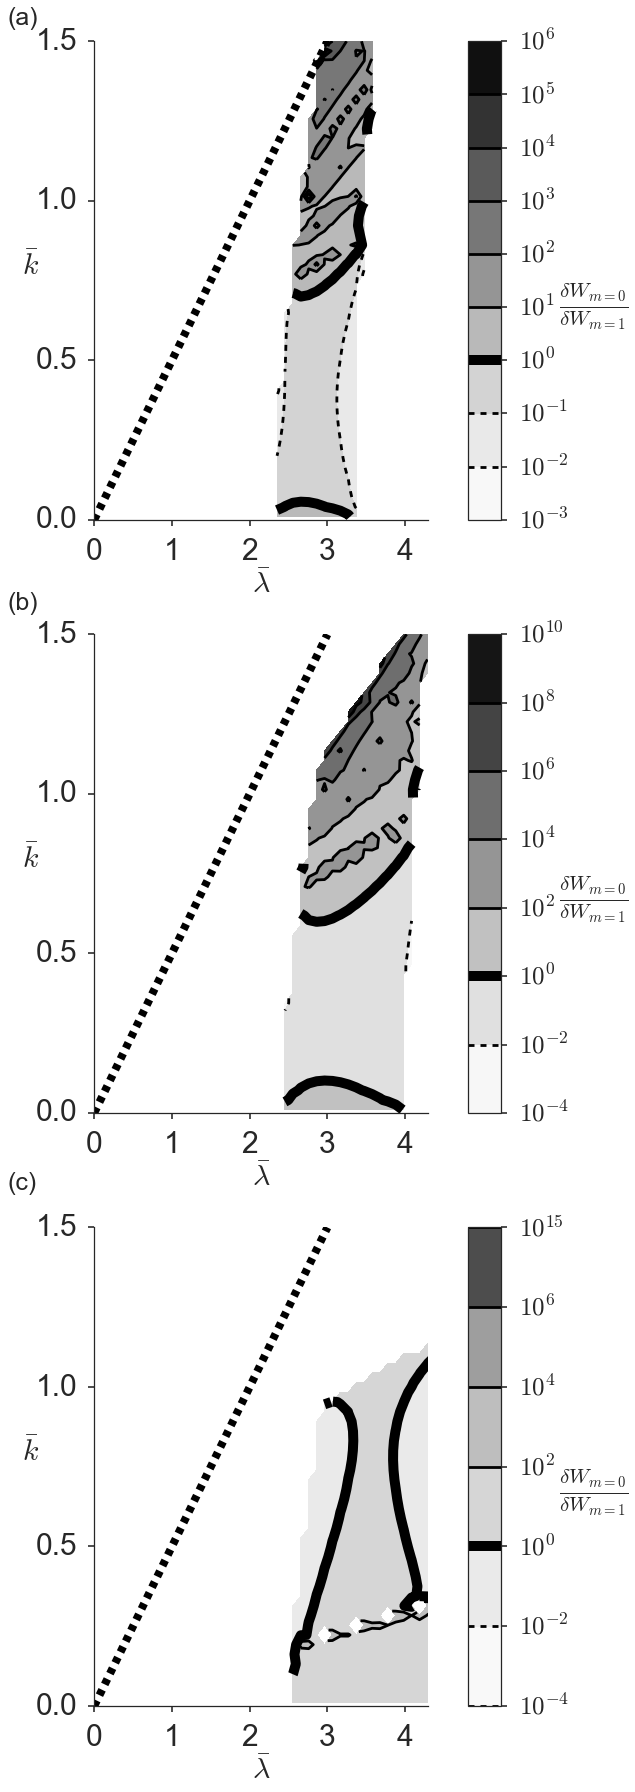

In [164]:
fig = plt.figure(figsize=(9,25))

ratio_ax1 = plt.subplot2grid((9, 3), (0, 0), colspan=3, rowspan=3)
ratio_ax2 = plt.subplot2grid((9, 3), (3, 0), colspan=3, rowspan=3)
ratio_ax3 = plt.subplot2grid((9, 3), (6, 0), colspan=3, rowspan=3)

sausage_kink_ratio(ratio_ax1, '../../output/2016-04-29-17-15/meshes.npz',
                   cmap="Greys",
                   zero_line=2, label_lines=False, 
                   cbar_zero_line=2)

sausage_kink_ratio(ratio_ax2, '../../output/2016-04-29-11-13/meshes.npz',
                   cmap="Greys",
                   zero_line=1, label_lines=False,
                   cbar_zero_line=1)

sausage_kink_ratio(ratio_ax3, '../../output/2016-04-29-11-36/meshes.npz',
                   cmap="Greys", 
                   levels=[-4, -2, 0, 2, 4, 6, 15],
                   zero_line=2, label_lines=False,
                   cbar_zero_line=2)
plt.tight_layout()

plt.figtext(0.01, 0.99, '(a)', fontsize=25)
plt.figtext(0.01, 0.665, '(b)', fontsize=25)
plt.figtext(0.01, 0.343, '(c)', fontsize=25)